In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, LSTM, concatenate, Dropout
from tensorflow.keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, BatchNormalization, Activation, Flatten

In [2]:
df= pd.read_excel('Classification_collection.xlsx', sheet_name='A')# Data used in Classification 

In [3]:
test= pd.read_excel('Classification_collection.xlsx', sheet_name='T')# Data used in Classification 

In [4]:
# Assuming df is your DataFrame
t = df.iloc[:, 315:415]
dp = df.iloc[:, 515:615]
target = df.iloc[:, 9]

# Dividing each value in t and dp by the corresponding target value for each row
t_normalized = t.div(target, axis=0)
dp_normalized = dp.div(target, axis=0)

# You can replace the original columns with the normalized columns if desired
df.iloc[:, 315:415] = t_normalized
df.iloc[:, 515:615] = dp_normalized

# # Create a new DataFrame with the normalized columns
# normalized_df = pd.concat([t_normalized, dp_normalized], axis=1)


# normalized_df.head()  # Display the first few rows to check the results
###############################################
t1 = test.iloc[:, 315:415]
dp1 = test.iloc[:, 515:615]
target1 = test.iloc[:, 9]

# Dividing each value in t and dp by the corresponding target value for each row
t_normalized1 = t1.div(target1, axis=0)
dp_normalized1 = dp1.div(target1, axis=0)

# You can replace the original columns with the normalized columns if desired
test.iloc[:, 315:415] = t_normalized1
test.iloc[:, 515:615] = dp_normalized1

In [5]:
# Good results in classification 
# Get df values
X = df.values
X[X==0] = 1e-5



X_train_base, X_t_base = train_test_split(X, test_size=0.15, random_state=100, shuffle=True)
X_test_base, X_val_base = train_test_split(X_t_base, test_size=0.5, random_state=50, shuffle=True)

# Normalization
# Standardize the training input data
scaler_t = StandardScaler()
scaler_p = StandardScaler()
scaler_dp = StandardScaler()

# Create and normalize train datasets for 1D
list = [0] # Labels index
num_time_steps = 100
norm_log_t_train = scaler_t.fit_transform(np.log(X_train_base[:,315:415].astype(float)))
norm_log_p_train = scaler_p.fit_transform((X_train_base[:,415:515].astype(float)))
norm_log_dp_train = scaler_dp.fit_transform(np.log(X_train_base[:,515:615].astype(float))) # only this column was required 
norm_target_train = (X_train_base[:, list].astype(int))

# Discard time, normalize logP, logdP for 2D
X_train = np.stack([norm_log_t_train,   norm_log_dp_train], axis=2)  # Stacking 'dp' and 'derp'
train_label = norm_target_train -1

X_train_1 =  np.hstack([ norm_log_t_train, norm_log_dp_train])#norm_log_p_train, norm_log_t_train,
X_train_1 = X_train_1.reshape((X_train_1.shape[0], X_train_1.shape[1], 1))
train_label = norm_target_train -1

# Create and normalize test datasets 1D
norm_t_test = scaler_t.transform(np.log(X_test_base[:,315:415].astype(float)))
norm_log_p_test = scaler_p.transform((X_test_base[:,415:515].astype(float)))
norm_log_dp_test = scaler_dp.transform(np.log(X_test_base[:,515:615].astype(float)))
norm_target_test = (X_test_base[:, list].astype(int))

# Discard time, normalize logP, logdP 2D
X_test = np.stack([norm_t_test,  norm_log_dp_test], axis=2)  # Stacking 'dp' and 'derp'
test_label = norm_target_test 

X_test_1 =   np.hstack([ norm_t_test, norm_log_dp_test])#norm_log_p_test, norm_t_test,
X_test_1 = X_test_1.reshape((X_test_1.shape[0], X_test_1.shape[1], 1))
test_label = norm_target_test -1

# Create and normalize Val datasets
norm_t_val = scaler_t.transform(np.log(X_val_base[:,315:415].astype(float)))
norm_log_p_val = scaler_p.transform((X_val_base[:,415:515].astype(float)))
norm_log_dp_val = scaler_dp.transform(np.log(X_val_base[:,515:615].astype(float)))
norm_target_val = (X_val_base[:, list].astype(int))

# Discard time, normalize logP, logdP
X_val =  np.stack([norm_t_val,  norm_log_dp_val], axis=2)  # Stacking 'dp' and 'derp'
val_label = norm_target_val

X_val_1 =   np.hstack([norm_t_val,  norm_log_dp_val])#norm_log_p_val,
X_val_1 =  X_val_1.reshape((X_val_1.shape[0], X_val_1.shape[1], 1))
val_label = norm_target_val -1



# 1D
train_sets1 = [X_train_1, train_label] # can add the lebel to the array ",train_label"
test_sets1  = [X_test_1, test_label]
val_sets1  = [X_val_1, val_label]


# 2D
train_sets2 = [X_train, train_label] # can add the lebel to the array ",train_label"
test_sets2  = [X_test, test_label]
val_sets2  = [X_val, val_label]

print("Train data shape:", X_train.shape, train_label.shape)
print("Test data shape:", X_test.shape, test_label.shape)
print("Val data shape:", X_val.shape, val_label.shape)

Train data shape: (6460, 100, 2) (6460, 1)
Test data shape: (570, 100, 2) (570, 1)
Val data shape: (570, 100, 2) (570, 1)


In [147]:
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import RobustScaler

# # Get df values
# X = df.values
# list = [0] # Labels index (K=9, L=10, Skin=11)
# # Dimensionless
# t = X[:,315:415].astype(float)# tD/CD
# p = X[:,415:515].astype(float)
# dp = X[:,515:615].astype(float)
# output = X[:,list].astype(int) -1

# # Combine t, p, and dp into a single array for each test
# combined_data = np.stack((t, p, dp), axis=2)

# # Split the data into training (70%), validation (20%), and test (10%) sets
# # First, split into train (70%) and temp (30%)
# X_train, X_temp, y_train, y_temp = train_test_split(combined_data, output, test_size=0.3, random_state=42, shuffle=True)

# # Then, split the temp into validation (20%) and test (10%)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, shuffle=True)

# # Reshape y_train, y_val, y_test for scaling
# y_train = y_train.reshape(-1, 1)
# y_val = y_val.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

# # Standardize the training input data
# scaler_t = StandardScaler()
# scaler_p = StandardScaler()
# scaler_dp = StandardScaler()

# t_train_standardized = scaler_t.fit_transform(np.log(X_train[:, :, 0]))
# #p_train_standardized = scaler_p.fit_transform(np.log(X_train[:, :, 1]))
# dp_train_standardized = scaler_dp.fit_transform(np.log(X_train[:, :, 2]))

# # Transform validation and test input data using the scalers fitted on the training data
# t_val_standardized = scaler_t.transform(np.log(X_val[:, :, 0]))
# #p_val_standardized = scaler_p.transform(np.log(X_val[:, :, 1]))
# dp_val_standardized = scaler_dp.transform(np.log(X_val[:, :, 2]))

# t_test_standardized = scaler_t.transform(np.log(X_test[:, :, 0]))
# #p_test_standardized = scaler_p.transform(np.log(X_test[:, :, 1]))
# dp_test_standardized = scaler_dp.transform(np.log(X_test[:, :, 2]))

# # Standardize the output data
# scaler_output = StandardScaler()
# output_train_standardized =  scaler_output.fit_transform(y_train).flatten()
# output_val_standardized = scaler_output.transform(y_val).flatten()
# output_test_standardized = scaler_output.transform(y_test).flatten()

# # Combine standardized t, p, and dp into a single array for each test
# X_train_standardized =   np.stack((t_train_standardized,  dp_train_standardized), axis=2)
# X_val_standardized =  np.stack((t_val_standardized,  dp_val_standardized), axis=2)
# X_test_standardized =  np.stack((t_test_standardized,  dp_test_standardized), axis=2)


# X_train= X_train_standardized
# #y_train = output_train_standardized
# X_test= X_test_standardized
# #y_test= output_test_standardized
# X_val= X_val_standardized
# #y_val= output_val_standardized

# # 2D
# train_sets3 = [X_train, y_train] # can add the lebel to the array ",train_label"
# test_sets3  = [X_test, y_test]
# val_sets3  = [X_val, y_val]

# # Check the shapes of the splits
# print("Train data shape:", X_train_standardized.shape, output_train_standardized.shape)
# print("Validation data shape:", X_val_standardized.shape, output_val_standardized.shape)
# print("Test data shape:", X_test_standardized.shape, output_test_standardized.shape)

In [10]:
# Get df values
X = test.values
list = [0] # Labels index (K=9, L=10, Skin=11)
# Dimensionless
t = X[:,315:415].astype(float)# tD/CD
p = X[:,415:515].astype(float)
dp = X[:,515:615].astype(float)
output = X[:,list].astype(float)

# Combine t, p, and dp into a single array for each test
combined_data = np.stack((t, p, dp), axis=2)

X_field = combined_data

# Reshape y_train, y_val, y_test for scaling
y_field = output.reshape(-1, 1)


t_field_standardized = scaler_t.transform(np.log(X_field[:, :, 0]))
#p_field_standardized = scaler_p.transform(np.log(X_field[:, :, 1]))
dp_field_standardized = scaler_dp.transform(np.log(X_field[:, :, 2]))
#output_field_standardized =  scaler_output.transform(y_field).flatten()

X_field_standardized =   np.stack((t_field_standardized,  dp_field_standardized), axis=2)
X_field_1 =   np.hstack([t_field_standardized ,  dp_field_standardized])

X_field= X_field_standardized
y_field = output -1 #output_field_standardized

field_sets1  = [X_field_1 , y_field]
field_sets2  = [X_field, y_field]

print("Test data shape:", X_field.shape, y_field.shape)

Test data shape: (164, 100, 2) (164, 1)


In [88]:
# # Assuming df is your DataFrame
# t = test.iloc[:, 315:415]
# dp = test.iloc[:, 515:615]
# target = test.iloc[:, 9]

# # Dividing each value in t and dp by the corresponding target value for each row
# t_normalized = t.div(target, axis=0)
# dp_normalized = dp.div(target, axis=0)

# # You can replace the original columns with the normalized columns if desired
# test.iloc[:, 315:415] = t_normalized
# test.iloc[:, 515:615] = dp_normalized


# # Add and normalize field data
# # Get df values
# X = test.values
# #X[X==0] = 1e-5

# # Log transformation and normalization for test data using the trained scaler
# norm_log_t_field = scaler_t.transform(np.log(X[:,315:415].astype(float)))
# norm_log_p_field = scaler_p.transform((X[:,415:515].astype(float)))
# norm_log_dp_field = scaler_dp.transform(np.log(X[:,515:615].astype(float))) 
# norm_target_field = (X[:, list].astype(int))

# # Discard time, normalize logP, logdP
# X_field =  np.stack([norm_log_t_field,  norm_log_dp_field], axis=2)  # Stacking 'dp' and 'derp'
# # X_field_reshaped = X_field.reshape(-1, num_time_steps, 2)
# val_field = norm_target_field

# X_field_1 =  norm_log_dp_field# np.hstack([norm_log_t_field,  norm_log_dp_field])#norm_log_p_val,
# X_field_1 =  X_field_1.reshape((X_field_1.shape[0], X_field_1.shape[1], 1))
# field_label = norm_target_field -1
# field_sets1  = [X_field, field_label]

In [190]:
# # Get df values
# X = df.values
# X[X==0] = 1e-5



# X_train_base, X_test_base = train_test_split(X, test_size=0.2, random_state=100, shuffle=True)
# X_train_base, X_val_base = train_test_split(X_train_base, test_size=0.05, random_state=50, shuffle=True)

# # Normalization
# # Standardize the training input data
# scaler_t = StandardScaler()
# scaler_p = StandardScaler()
# scaler_dp = StandardScaler()

# # Create and normalize train datasets for 1D
# list = [0] # Labels index
# num_time_steps = 100
# norm_log_t_train = scaler_t.fit_transform((X_train_base[:,315:415].astype(float)))
# norm_log_p_train = scaler_p.fit_transform((X_train_base[:,415:515].astype(float)))
# norm_log_dp_train = scaler_dp.fit_transform((X_train_base[:,515:615].astype(float))) # only this column was required 
# norm_target_train = (X_train_base[:, list].astype(int))

# # Discard time, normalize logP, logdP for 2D
# X_train = np.stack([norm_log_p_train,   norm_log_dp_train], axis=2)  # Stacking 'dp' and 'derp'
# X_train_reshaped = X_train.reshape(-1, num_time_steps, 2)
# train_label = norm_target_train -1

# X_train_1 =  np.hstack([ norm_log_t_train, norm_log_dp_train])#norm_log_p_train, norm_log_t_train,
# #X_train_1 = X_train_1.reshape((X_train_1.shape[0], X_train_1.shape[1], 1))
# train_label = norm_target_train -1

# # Create and normalize test datasets 1D
# norm_t_test = scaler_t.transform((X_test_base[:,315:415].astype(float)))
# norm_log_p_test = scaler_p.transform((X_test_base[:,415:515].astype(float)))
# norm_log_dp_test = scaler_dp.transform((X_test_base[:,515:615].astype(float)))
# norm_target_test = (X_test_base[:, list].astype(int))

# # Discard time, normalize logP, logdP 2D
# X_test = np.stack([norm_log_p_test,  norm_log_dp_test], axis=2)  # Stacking 'dp' and 'derp'
# X_test_reshaped = X_test.reshape(-1, num_time_steps, 2)
# test_label = norm_target_test 

# X_test_1 =  np.hstack([ norm_t_test, norm_log_dp_test])#norm_log_p_test, norm_t_test,
# #X_test_1 = X_test_1.reshape((X_test_1.shape[0], X_test_1.shape[1], 1))
# test_label = norm_target_test -1

# # Create and normalize Val datasets
# norm_t_val = scaler_t.transform((X_val_base[:,315:415].astype(float)))
# norm_log_p_val = scaler_p.transform((X_val_base[:,415:515].astype(float)))
# norm_log_dp_val = scaler_dp.transform((X_val_base[:,515:615].astype(float)))
# norm_target_val = (X_val_base[:, list].astype(int))

# # Discard time, normalize logP, logdP
# X_val =  np.stack([norm_log_p_val,  norm_log_dp_val], axis=2)  # Stacking 'dp' and 'derp'
# # X_val_reshaped = X_val.reshape(-1, num_time_steps, 2)
# val_label = norm_target_val

# X_val_1 =   np.hstack([norm_t_val,  norm_log_dp_val])#norm_log_p_val,
# #X_val_1 =  X_val_1.reshape((X_val_1.shape[0], X_val_1.shape[1], 1))
# val_label = norm_target_val -1



# # 1D
# train_sets1 = [X_train_1, train_label] # can add the lebel to the array ",train_label"
# test_sets1  = [X_test_1, test_label]
# val_sets1  = [X_val_1, val_label]


# # 2D
# train_sets2 = [X_train, train_label] # can add the lebel to the array ",train_label"
# test_sets2  = [X_test, test_label]
# val_sets2  = [X_val, val_label]

In [234]:
# X_field.shape

(4436, 100, 2)

In [233]:
# # Add and normalize field data
# # Get df values
# X = test.values
# #X[X==0] = 1e-5

# # Log transformation and normalization for test data using the trained scaler
# norm_log_t_field = scaler_t.transform((X[:,315:415].astype(float)))
# norm_log_p_field = scaler_p.transform((X[:,415:515].astype(float)))
# norm_log_dp_field = scaler_dp.transform((X[:,515:615].astype(float))) 
# norm_target_field = (X[:, list].astype(int))

# # Discard time, normalize logP, logdP
# X_field =  np.stack([norm_log_p_field,  norm_log_dp_field], axis=2)  # Stacking 'dp' and 'derp'
# # X_field_reshaped = X_field.reshape(-1, num_time_steps, 2)
# val_field = norm_target_field

# X_field_1 =   np.hstack([norm_log_t_field,  norm_log_dp_field])#norm_log_p_val,
# #X_field_1 =  X_field_1.reshape((X_field_1.shape[0], X_field_1.shape[1], 1))
# field_label = norm_target_field -1
# field_sets1  = [X_field_1, field_label]
# field_sets2  = [X_field, field_label]

In [40]:
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout, LSTM, Conv1D, Flatten
from tensorflow.keras.models import Sequential



# Define the model creation function with optimal hyperparameters for multi-class classification
def CNN_LSTM():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu', 
                     strides=2,
                     input_shape=(train_sets2[0].shape[1], 2)))
    model.add(BatchNormalization())
    
    model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
    model.add(BatchNormalization())

    model.add(LSTM(90))
    model.add(Dropout(0.1))
    model.add(Flatten())
    
    model.add(Dense(32, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # softmax for multi-class classification

    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def CNN():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', 
                     strides=2,
                     input_shape=(train_sets2[0].shape[1], 2)))
    model.add(BatchNormalization())
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())

    model.add(Dropout(0.2))
    model.add(Flatten())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # softmax for multi-class classification

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Create the model
model = CNN_LSTM()

# Print model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 48, 32)            352       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 32)            128       
 chNormalization)                                                
                                                                 
 conv1d_9 (Conv1D)           (None, 42, 64)            14400     
                                                                 
 batch_normalization_7 (Bat  (None, 42, 64)            256       
 chNormalization)                                                
                                                                 
 lstm_3 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_4 (Dropout)         (None, 90)               

In [41]:
# Step 4: Compile and train the model CNN
history= model.fit(train_sets2[0], train_sets2[1], validation_data=(test_sets2[0], test_sets2[1]),
                    epochs=80, batch_size=16)#epochs=250  ,validation_split= 0.1

Epoch 1/80
404/404 [==============================] - 7s 12ms/step - loss: 0.5615 - accuracy: 0.7420 - val_loss: 0.3864 - val_accuracy: 0.8211
Epoch 2/80
404/404 [==============================] - 5s 11ms/step - loss: 0.4496 - accuracy: 0.7825 - val_loss: 0.3246 - val_accuracy: 0.8404
Epoch 3/80
404/404 [==============================] - 4s 11ms/step - loss: 0.4135 - accuracy: 0.7892 - val_loss: 0.3498 - val_accuracy: 0.8474
Epoch 4/80
404/404 [==============================] - 4s 11ms/step - loss: 0.3266 - accuracy: 0.8166 - val_loss: 0.2375 - val_accuracy: 0.8667
Epoch 5/80
404/404 [==============================] - 5s 11ms/step - loss: 0.3354 - accuracy: 0.8147 - val_loss: 0.2105 - val_accuracy: 0.8509
Epoch 6/80
404/404 [==============================] - 4s 11ms/step - loss: 0.2986 - accuracy: 0.8279 - val_loss: 0.2030 - val_accuracy: 0.8614
Epoch 7/80
404/404 [==============================] - 5s 11ms/step - loss: 0.2694 - accuracy: 0.8438 - val_loss: 0.1896 - val_accuracy: 0.8632

In [42]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(field_sets2[0], field_sets2[1])
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)

6/6 [==============================] - 0s 6ms/step - loss: 6.0000 - accuracy: 0.4695
Testing Loss: 5.9999823570251465
Testing Accuracy: 0.4695121943950653


In [38]:
# Step 8: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(val_sets2[0], val_sets2[1])
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)

18/18 [==============================] - 0s 6ms/step - loss: 0.0273 - accuracy: 0.9842
Testing Loss: 0.02725616842508316
Testing Accuracy: 0.9842105507850647


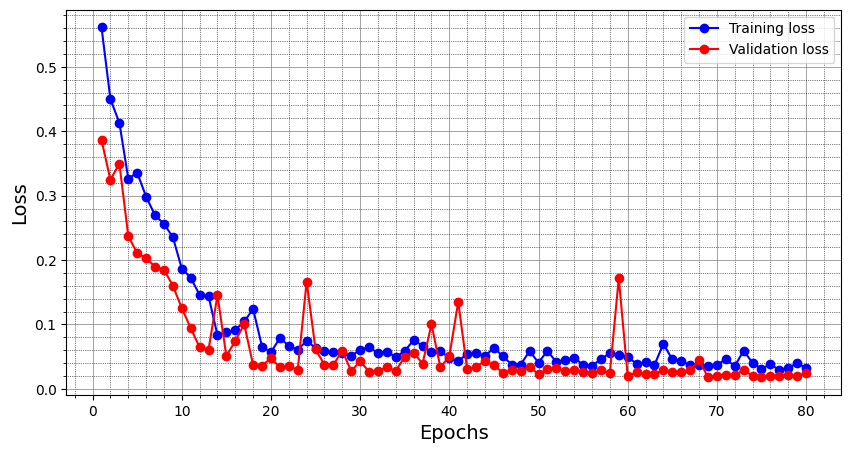

In [43]:
# Assuming 'history' is the object returned by the model.fit() method
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, 81)  # Adjust this based on the number of epochs you have used

plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, 'bo-', label='Training loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation loss')
#plt.title('Training and Validation Loss per Epoch- CNN', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()

# Adding grid with major and minor lines
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')  # Major grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')  # Minor grid
plt.minorticks_on()  # Enable minor ticks

# # # Save the figure at a high resolution
# plt.savefig('Train_loss_CNN_2D_classification_final.png', dpi=1200)

# # Save the figure as a high-resolution PDF
# plt.savefig('Training_Validation_Loss_CNN_final.pdf', format='pdf', dpi=1200)

plt.show()

In [243]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Conv1D, Dense, LSTM, Dropout, Flatten, BatchNormalization

def build_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('conv1d_filters1', min_value=32, max_value=128, step=32), 
                     kernel_size=hp.Int('conv1d_kernel1', min_value=3, max_value=7, step=2), 
                     activation='relu', 
                     input_shape=(100, 2)))
    model.add(BatchNormalization())

    model.add(Conv1D(filters=hp.Int('conv1d_filters2', min_value=32, max_value=128, step=32), 
                     kernel_size=hp.Int('conv1d_kernel2', min_value=3, max_value=7, step=2), 
                     activation='relu'))
    model.add(BatchNormalization())

    if hp.Boolean('dropout'):
        model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    #model.add(LSTM(hp.Int('lstm_units', min_value=10, max_value=100, step=10), return_sequences=True))
    model.add(Flatten())

    model.add(Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(4, activation='softmax'))  # For multi-class classification

    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [244]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=100,
    hyperband_iterations=1,
    directory = 'my_tuner_results',
    project_name = 'CNN_2D'
)

In [245]:
tuner.search(train_sets2[0], train_sets2[1], epochs=100, validation_split=0.2)

Trial 254 Complete [00h 03m 13s]
val_accuracy: 0.9930796027183533

Best val_accuracy So Far: 0.995674729347229
Total elapsed time: 02h 19m 53s


In [246]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [248]:
print(f"""
1D-CNN Model Classification (2 vector input 100 features)
The hyperparameter search is complete. 
Optimal number of filters in the first Conv1D layer: {best_hps.get('conv1d_filters1')}
Optimal kernel size for the first Conv1D layer: {best_hps.get('conv1d_kernel1')}
Optimal number of filters in the second Conv1D layer: {best_hps.get('conv1d_filters2')}
Optimal kernel size for the second Conv1D layer: {best_hps.get('conv1d_kernel2')}
Optimal number of units in the Dense layer: {best_hps.get('dense_units')}
Optimal dropout rate: {best_hps.get('dropout_rate')}

""")


1D-CNN Model Classification (2 vector input 100 features)
The hyperparameter search is complete. 
Optimal number of filters in the first Conv1D layer: 64
Optimal kernel size for the first Conv1D layer: 5
Optimal number of filters in the second Conv1D layer: 32
Optimal kernel size for the second Conv1D layer: 5
Optimal number of units in the Dense layer: 64
Optimal dropout rate: 0.2




In [33]:
# Step 5: Evaluate the model
y_pred_train = np.argmax(model.predict(train_sets2[0]), axis=1)
y_pred_test = np.argmax(model.predict(val_sets2[0]), axis=1)

18/18 [==============================] - 0s 6ms/step


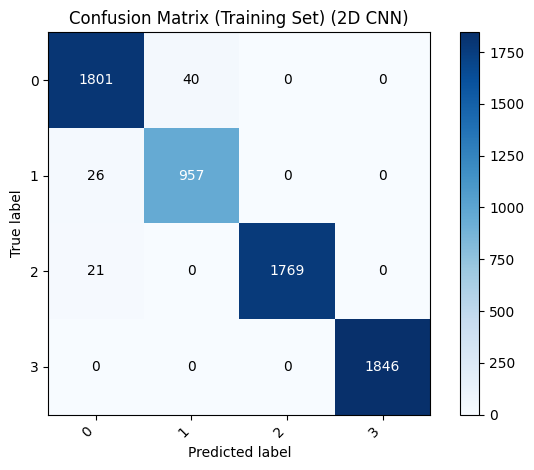

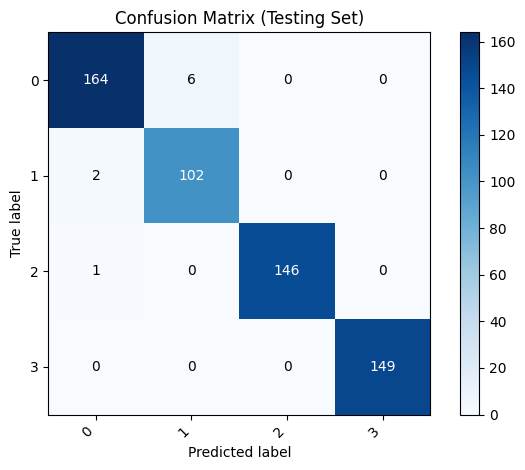

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1841
           1       0.96      0.97      0.97       983
           2       1.00      0.99      0.99      1790
           3       1.00      1.00      1.00      1846

    accuracy                           0.99      6460
   macro avg       0.98      0.99      0.98      6460
weighted avg       0.99      0.99      0.99      6460

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       170
           1       0.94      0.98      0.96       104
           2       1.00      0.99      1.00       147
           3       1.00      1.00      1.00       149

    accuracy                           0.98       570
   macro avg       0.98      0.98      0.98       570
weighted avg       0.98      0.98      0.98       570



In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


# Step 6: Generate evaluation plots and matrices
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.xticks(rotation=45, ha='right')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


# Plot confusion matrix for the training set
plot_confusion_matrix(train_sets2[1], y_pred_train, classes=np.unique(train_sets2[1]), normalize=False, title='Confusion Matrix (Training Set) (2D CNN)')
plt.show()

# Plot confusion matrix for the testing set
plot_confusion_matrix(val_sets2[1], y_pred_test, classes=np.unique(val_sets2[1]), normalize=False, title='Confusion Matrix (Testing Set)')
plt.show()

# Print classification report for the training set
print("Classification Report (Training Set):\n", classification_report(train_sets2[1], y_pred_train))

# Print classification report for the testing set
print("Classification Report (Testing Set):\n", classification_report(val_sets2[1], y_pred_test))

In [327]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Shuffle the training data
idx = np.random.permutation(len(train_sets1[0]))
X_train = train_sets1[0][idx]
y_train = train_sets1[1][idx]

# Reshape the data for the transformer model
X_train_reshaped = train_sets2[0].reshape((train_sets1[0].shape[0], 100, 2))
X_test_reshaped = test_sets2[0].reshape((test_sets1[0].shape[0], 100, 2))
X_val_reshaped = val_sets2[0].reshape((val_sets1[0].shape[0], 100, 2))
X_field_reshaped = field_sets2[0].reshape((field_sets1[0].shape[0], 100, 2))
input_shape = (100, 2)


# Print reshaped shapes
print(f"Reshaped X_train shape: {X_train_reshaped.shape}")
print(f"Reshaped X_test shape: {X_test_reshaped.shape}")
print(f"Reshaped X_val shape: {X_val_reshaped.shape}")
print(f"Reshaped X_field shape: {X_field_reshaped.shape}")

# Define the transformer encoder block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

# Define the model architecture
def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0, num_classes=4):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    
    x = layers.GlobalAveragePooling1D()(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)  # For multi-class classification
    return keras.Model(inputs, outputs)




from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define the model architecture
model = build_model(
    input_shape,
    head_size=4,          # Increased head size
    num_heads=2,            # Increased number of heads
    ff_dim=17,             # Increased feed-forward network dimension
    num_transformer_blocks= 10, # Increased number of transformer blocks
    mlp_units=[10],   # Increased MLP units
    mlp_dropout=0.3,        # Adjusted MLP dropout
    dropout=0.5,            # Adjusted dropout
    num_classes=len(np.unique(y_train))
)

# Compile the model with a lower learning rate and a different optimizer
model.compile(
    loss="sparse_categorical_crossentropy",  # For multi-class classification
    optimizer=keras.optimizers.Adam(learning_rate=0.01),  # Lower learning rate
    metrics=["accuracy"]
)


model.summary()

Reshaped X_train shape: (6460, 100, 2)
Reshaped X_test shape: (570, 100, 2)
Reshaped X_val shape: (570, 100, 2)
Reshaped X_field shape: (4436, 100, 2)
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 100, 2)]             0         []                            
                                                                                                  
 multi_head_attention_40 (M  (None, 100, 2)               90        ['input_5[0][0]',             
 ultiHeadAttention)                                                  'input_5[0][0]']             
                                                                                                  
 dropout_97 (Dropout)        (None, 100, 2)               0         ['multi_head_attention_40[0][0
                                        

In [328]:
# Define callbacks
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=5, min_lr=0.01),  # Reduce learning rate on plateau
   
]
# ModelCheckpoint('best_model.h5', save_best_only=True)  # Save the best model
# Train the model
history = model.fit(
    train_sets2[0],
    train_sets2[1],
    validation_data=(test_sets2[0], test_sets2[1]),
    epochs=100,  # Increased number of epochs for better convergence
    batch_size=16,
    #callbacks=callbacks
)

Epoch 1/100
404/404 [==============================] - 51s 94ms/step - loss: 1.3649 - accuracy: 0.3249 - val_loss: 1.4312 - val_accuracy: 0.3737
Epoch 2/100
404/404 [==============================] - 36s 90ms/step - loss: 1.3393 - accuracy: 0.3429 - val_loss: 1.3478 - val_accuracy: 0.3544
Epoch 3/100
367/404 [==========================>...] - ETA: 3s - loss: 1.3357 - accuracy: 0.3358

KeyboardInterrupt: 